In [29]:
# Import library

import pandas as pd
import requests
import matplotlib.pyplot as plt

# DOWNLOAD AND LOAD DATASET

In [30]:
# Download dataset

response = requests.get("https://raw.githubusercontent.com/yinghaoz1/tmdb-movie-dataset-analysis/master/tmdb-movies.csv")
with open("tmdb-movies.csv", "wb") as wf:
    wf.write(response.content)

In [31]:
#Load dataset

df = pd.read_csv("tmdb-movies.csv")

# OVERVIEW AND PRE-PROCESS DATA

### Overview of dataset

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [33]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Column names: {df.columns.tolist()}")

Number of rows: 10866
Number of columns: 21
Column names: ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [34]:
# Director
da = df[df['director'].notna()]  # Get rows with not null in director column
all_directors = da['director'].str.split('|').explode().str.strip()
all_directors = all_directors[all_directors != ''] # after splitting, there exist empty
unique_directors = all_directors.nunique()

# Actor or Actress
dv = df[df['cast'].notna()] # Get rows with not null in cast column
all_actors = dv['cast'].str.split('|').explode().str.strip()
all_actors = all_actors[all_actors != ''] # after splitting, there exist empty
unique_actors = all_actors.nunique()

print(f"There are {unique_directors} directors")
print(f"There are {unique_actors} actors and actresses")


There are 5361 directors
There are 19026 actors and actresses


In [35]:
# Types of Movies
dg = df[df['genres'].notna()] # Get rows with not null in genres column
all_genres = dg['genres'].str.split('|').explode().str.strip()
all_genres = all_genres[all_genres != ''] # after splitting, there exist empty
unique_genres = all_genres.nunique()

print(f"There are {unique_genres} genres")

There are 20 genres


<span style="color: tan;"> 23 missing genres can affect the analysis below </span>

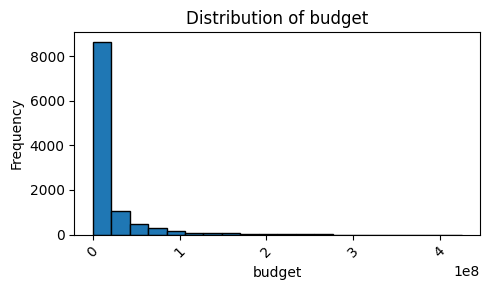

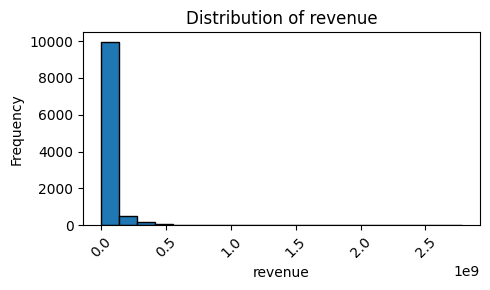

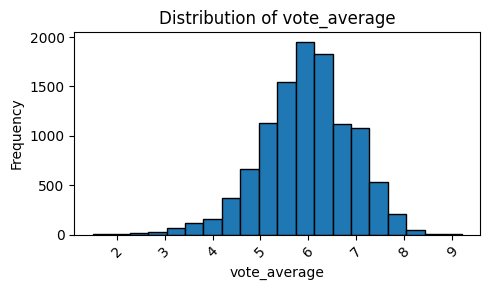

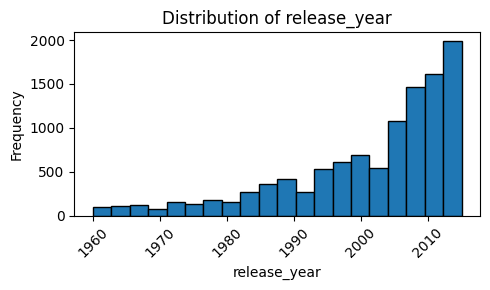

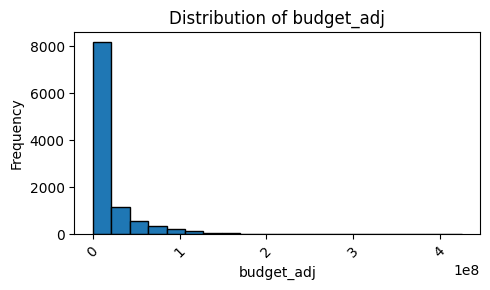

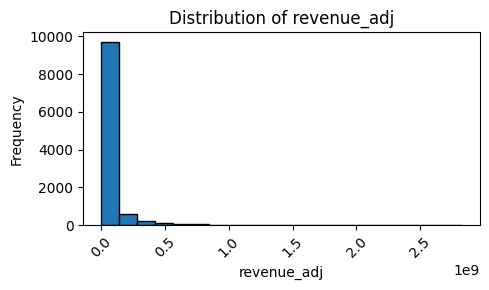

In [36]:
for col in df.columns:
    if col in ('revenue', 'budget', 'revenue_adj', 'budget_adj', 'vote_average', 'release_year'):
        plt.figure(figsize=(5, 3))
        df[col].plot(kind='hist', bins=20, edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


### Pre-process data

In [37]:

num_duplicates = df.duplicated().sum()
duplicates = df[df.duplicated(keep=False)]
print("Duplicate rows:")
print(duplicates)

print(f"Remove {num_duplicates} duplicates")
df = df.drop_duplicates()

Duplicate rows:
         id    imdb_id  popularity    budget  revenue original_title  \
2089  42194  tt0411951     0.59643  30000000   967000         TEKKEN   
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2089  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2089  Dwight H. Little  Survival is no game  ...   
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2089  In the year of 2039, after World Wars destroy ...      92   
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2089  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   
2090  Crime|Drama|Action|Thriller|Science Fiction

In [38]:
total_missing = df.isnull().sum().sum()
print(f"The total number of missing values: {total_missing}")

missing_col = df.isnull().sum()
missing_col = missing_col[missing_col > 0]
print("Features have missing values:")
print(missing_col)

The total number of missing values: 13433
Features have missing values:
imdb_id                   10
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64


In [39]:
# Process Date type
def format_date(row):
    try:
        date = row['release_date']
        parts = date.split('/')
        month = parts[0].zfill(2)
        day = parts[1].zfill(2)
        year = str(row['release_year'])
        return f"{year}/{month}/{day}"
    except:
        return None

df['release_date'] = df.apply(format_date, axis=1)

# ANALYSIS

In [40]:
# 1. Sort movies by release date in descending order and save to a new file
sorted_movies_by_date = df.sort_values(by='release_date', ascending=False)
sorted_movies_by_date.to_csv('output/sorted_movies_by_date.csv', index=False)

In [41]:
# 2. Filter out movies with an average voting above 7.5 and save to a new file
above_75_rate_movies = df[df['vote_average'] > 7.5]
above_75_rate_movies.to_csv('output/above_75_rate_movies.csv', index=False)

print(f"The number of above 7.5 rate movies: {len(above_75_rate_movies)}")

The number of above 7.5 rate movies: 350


In [42]:
# Ensure 'revenue' and 'revenue_adj' are numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['revenue_adj'] = pd.to_numeric(df['revenue_adj'], errors='coerce')

# 3.1 By 'revenue' field
max_revenue = df[df['revenue'] == df['revenue'].max()]
min_revenue = df[df['revenue'] == df['revenue'].min()]
max_revenue.to_csv('output/max_revenue.csv', index=False)
min_revenue.to_csv('output/min_revenue.csv', index=False)

print(f"The number of movies with max revenue: {len(max_revenue)}")
print(f"The number of movies with min revenue: {len(min_revenue)}")

# 3.2 By 'revenue_adj' field
max_revenue_adj = df[df['revenue_adj'] == df['revenue_adj'].max()]
min_revenue_adj = df[df['revenue_adj'] == df['revenue_adj'].min()]
max_revenue_adj.to_csv('output/max_revenue_adj.csv', index=False)
min_revenue_adj.to_csv('output/min_revenue_adj.csv', index=False)

print(f"The number of movies with max revenue adj: {len(max_revenue_adj)}")
print(f"The number of movies with min revenue adj: {len(min_revenue_adj)}")


The number of movies with max revenue: 1
The number of movies with min revenue: 6016
The number of movies with max revenue adj: 1
The number of movies with min revenue adj: 6016


In [43]:
# 4. Calculate total revenue of all movies
# 4.1 Total revenue
sum_revenue = df['revenue'].sum()

# 4.2 Total revenue_adj
sum_revenue_adj = df['revenue_adj'].sum()

with open ('output/single_output.txt', 'a', encoding='utf-8') as wf:
    wf.write(f"The sum of revenue by revenue field: {sum_revenue:.10f} dollars\n")
    wf.write(f"The sum of revenue by revenue_adj field: {sum_revenue_adj:.10f} dollars\n")

In [44]:
# 5. Top 10 highest profits
# 5.1 By revenue and budget
df['profit'] = df['revenue'] - df['budget']
top_profit = df.sort_values(by='profit', ascending=False).head(10)
top_profit.to_csv('output/top_profit.csv', index=False)

# 5.2 By revenue_adj and budget_adj
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
top_profit_adj = df.sort_values(by='profit_adj', ascending=False).head(10)
top_profit_adj.to_csv('output/top_profit_adj.csv', index=False)

In [45]:
# 6. Which director has the most films and which actor has the most films
# Director
director_count = all_directors.value_counts()
most_directed = director_count.idxmax()
num_movies_directed = director_count.max()

# Actor or Actress
actor_counts = all_actors.value_counts()
most_common_actor = actor_counts.idxmax()
num_movies = actor_counts.max()

with open ('output/single_output.txt', 'a', encoding='utf-8') as wf:
    wf.write(f"The director has the most movies is: {most_directed} ({num_movies_directed} movies)\n")
    wf.write(f"The actor or actress has the most movies is: {most_common_actor} ({num_movies} movies)\n")


In [46]:
# 7. Count the number of movies by genre.
# For example, how many movies are in the Action genre, how many are in the Family genre, ….
genres_count = all_genres.value_counts()

with open('output/statistic_movie_genres.txt', 'w', encoding='utf-8') as wf:
    for genre, count in genres_count.items():
        wf.write(f"{genre}: {count}\n")